# Shallow Neural Network in PyTorch

## Load Dependencies

In [4]:
import torch
import torch.nn as nn

from torchvision.datasets import MNIST
from torchvision import transforms

from torchsummary import summary


import matplotlib.pyplot as plt


## Load Data

In [5]:
train = MNIST('data', train=True, transform=transforms.ToTensor(), download=True)
test = MNIST('data', train=True, transform=transforms.ToTensor())
# ...toTensor() scales pixels from [o, 255] to [0, 1]

In [6]:
train.data.shape

torch.Size([60000, 28, 28])

In [7]:
train.data[0] # not scaled!

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

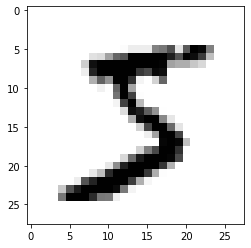

In [8]:
_= plt.imshow(train.data[0].numpy().squeeze(), cmap='gray_r')

In [9]:
train.targets[0:100]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7,
        1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0,
        7, 8, 3, 1])

In [10]:
train.targets.shape

torch.Size([60000])

In [11]:
test.data.shape

torch.Size([60000, 28, 28])

In [12]:
test.targets.shape

torch.Size([60000])

## Batch Data

In [13]:
train_loader = torch.utils.data.DataLoader(train, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=128)
#.... DataLoader() can also sample and run multithreaded over a set number of workers

In [14]:
X_sample, y_sample = iter(train_loader).next()

In [15]:
X_sample.shape

torch.Size([128, 1, 28, 28])

In [16]:
y_sample.shape

torch.Size([128])

In [17]:
y_sample

tensor([4, 2, 0, 3, 3, 7, 7, 8, 2, 5, 3, 7, 2, 1, 1, 0, 2, 5, 8, 1, 9, 4, 4, 0,
        2, 2, 0, 5, 6, 0, 6, 1, 2, 9, 8, 9, 1, 2, 9, 8, 7, 4, 5, 3, 4, 8, 3, 5,
        0, 8, 5, 6, 1, 4, 2, 8, 0, 7, 7, 1, 4, 6, 1, 7, 5, 4, 3, 1, 3, 2, 0, 3,
        8, 9, 9, 4, 4, 4, 2, 0, 5, 1, 8, 1, 6, 4, 1, 8, 4, 2, 4, 2, 5, 3, 4, 0,
        8, 2, 4, 2, 8, 4, 2, 7, 5, 9, 8, 6, 7, 5, 2, 1, 6, 3, 5, 1, 7, 7, 4, 2,
        7, 1, 5, 9, 1, 4, 6, 7])

In [18]:
X_sample[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [19]:
X_flat_sample = X_sample.view(X_sample.shape[0], -1) # view() reshape Tensor (confusingly) )

In [20]:
X_flat_sample.shape

torch.Size([128, 784])

In [21]:
X_flat_sample[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1176, 1.0000,
        0.1804, 0.0000, 0.0000, 0.0000, 

## Design Neural Network Architecture

In [22]:
n_input = 784
n_dense = 64
n_out = 10

In [23]:
model = nn.Sequential(
    nn.Linear(n_input, n_dense), # hidden layer
    nn.Sigmoid() , # activation function
    nn.Linear(n_dense, n_out) # output layer

)

In [24]:
summary(model, (1, n_input))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]          50,240
           Sigmoid-2                [-1, 1, 64]               0
            Linear-3                [-1, 1, 10]             650
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.19
Estimated Total Size (MB): 0.20
----------------------------------------------------------------


## Configure Training Hyperparameters

In [25]:
from torchmetrics import Accuracy

In [31]:
def accuracy_pct(pred_y, true_y):
  _, prediction = torch.max(pred_y, 1) # returns maximum values, indices; fed tensor, dim to reduce
  correct = (prediction == true_y).sum().item()
  return (correct / true_y.shape[0]) * 100.0

In [26]:
cost_fxn = nn.CrossEntropyLoss() # includes softmax activation

In [27]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

## Train

In [28]:
n_batches = len(train_loader)
n_batches

469

In [32]:
n_epochs = 20
print('Trainig for {} epochs. \n'.format(n_epochs))

for epoch in range(n_epochs):
    
    avg_cost = 0.0
    avg_accuracy = 0.0
    
    for i, (X, y) in enumerate(train_loader): # enumerate() provides cound of iterations
        
        
        # forward propagation:
        X_flat = X.view(X.shape[0], -1)
        y_hat = model(X_flat)
        cost = cost_fxn(y_hat, y)
        avg_cost += cost / n_batches
        
        # backprop and optimization via gradient descent:
        optimizer.zero_grad() # set gradients to zero; .backward() accumulates them in buffers
        cost.backward()
        optimizer.step()
        
        # calculate accuracy metric:
        accuracy = accuracy_pct(y_hat, y)
       
        avg_accuracy += accuracy / n_batches
        
        if (i + 1) % 100 ==0:
            print('Step {}'.format(i +1))
            
    print('Epoch {}/{} complete. Cost: {:.3f}, Accuracy: {:.1f}% \n'
        .format(epoch + 1, n_epochs, avg_cost, avg_accuracy)) 

print('Training Complete.')

Trainig for 20 epochs. 

Step 100
Step 200
Step 300
Step 400
Epoch 1/20 complete. Cost: 2.008, Accuracy: 55.8% 

Step 100
Step 200
Step 300
Step 400
Epoch 2/20 complete. Cost: 1.738, Accuracy: 64.1% 

Step 100
Step 200
Step 300
Step 400
Epoch 3/20 complete. Cost: 1.455, Accuracy: 70.5% 

Step 100
Step 200
Step 300
Step 400
Epoch 4/20 complete. Cost: 1.223, Accuracy: 75.4% 

Step 100
Step 200
Step 300
Step 400
Epoch 5/20 complete. Cost: 1.049, Accuracy: 78.7% 

Step 100
Step 200
Step 300
Step 400
Epoch 6/20 complete. Cost: 0.919, Accuracy: 81.0% 

Step 100
Step 200
Step 300
Step 400
Epoch 7/20 complete. Cost: 0.821, Accuracy: 82.5% 

Step 100
Step 200
Step 300
Step 400
Epoch 8/20 complete. Cost: 0.746, Accuracy: 83.8% 

Step 100
Step 200
Step 300
Step 400
Epoch 9/20 complete. Cost: 0.687, Accuracy: 84.6% 

Step 100
Step 200
Step 300
Step 400
Epoch 10/20 complete. Cost: 0.639, Accuracy: 85.4% 

Step 100
Step 200
Step 300
Step 400
Epoch 11/20 complete. Cost: 0.600, Accuracy: 86.1% 

Step 

## Test Model

In [34]:
n_test_batches = len(test_loader)
n_test_batches

469

In [38]:
model.eval() # disables dropout (and batch norm)

with torch.no_grad(): #disables autograd , reducing memory consumption
    
    avg_test_cost = 0.0
    avg_test_acc = 0.0
    
    for X, y in test_loader:
        
        # make predictions:
        X_flat = X.view(X.shape[0], -1)
        y_hat = model(X_flat)
        
        #calculate cost:
        cost = cost_fxn(y_hat, y)
        avg_test_cost += cost / n_test_batches
        
        # calculate accaccuracy :
        test_accuracy = accuracy_pct(y_hat, y)
        avg_test_acc += test_accuracy / n_test_batches
        
print('Test cost: {:.3f}, Test accuracy : {:.1f}% '.format(avg_test_cost, avg_test_acc))
      
# model.train() # undoes model.eval()      

Test cost: 0.424, Test accuracy : 89.0% 
